## Importar Libreria

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Cargar Datos

In [2]:
data = pd.read_csv('dataset_SCL.csv')

/Users/naxovalde/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Analizar Datos


### Esta sección tiene como objetivo entender mejor el dataset. Cantidad de datos, columnas, como describe cada columna

In [3]:
# Información de cantidad de datos y columnas
# Conocer los nombres y tipos de cada columna
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


In [4]:
data.head() # Ejemplo de los datos

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


### Conocer los rangos de los datos

In [5]:
print("Rango de Fecha programadas del vuelo")
print(min(data['Fecha-I']), " y ", max(data['Fecha-I']))
print()
print("Rango de Fecha operación del vuelo")
print(min(data['Fecha-O']), " y ", max(data['Fecha-O']))

Rango de Fecha programadas del vuelo
2017-01-01 00:15:00  y  2017-12-31 23:55:00

Rango de Fecha operación del vuelo
2017-01-01 00:04:00  y  2018-01-01 00:12:00


In [6]:
print("Valores distintos de número de vuelo programado: " + str(data['Vlo-I'].nunique()))
#print(data['Vlo-I'].unique())

Valores distintos de número de vuelo programado: 750


In [7]:
print("Valores distintos de número de vuelo de operación: ", str(data['Vlo-O'].nunique()))
#print(data['Vlo-O'].unique())

Valores distintos de número de vuelo de operación:  866


In [8]:
print("Valores distintos de códigos de ciudad de origen programado: ", str(data['Ori-I'].nunique()))
print(data['Ori-I'].unique())
print()
print("Valores distintos de códigos de ciudad de origen de operación: ", str(data['Ori-O'].nunique()))
print(data['Ori-O'].unique())

Valores distintos de códigos de ciudad de origen programado:  1
['SCEL']

Valores distintos de códigos de ciudad de origen de operación:  1
['SCEL']


In [9]:
print("Valores distintos de códigos de ciudad de destino programado: ", str(data['Des-I'].nunique()))
print(data['Des-I'].unique())
print()
print("Valores distintos de códigos de ciudad de destino de operación: ", str(data['Des-O'].nunique()))
print(data['Des-O'].unique())

Valores distintos de códigos de ciudad de destino programado:  64
['KMIA' 'KDFW' 'SAEZ' 'CYYZ' 'LFPG' 'MMMX' 'SABE' 'SKBO' 'LIRF' 'EGLL'
 'MPTO' 'KATL' 'SBGR' 'SBGL' 'SBFL' 'LEMD' 'SPJC' 'YSSY' 'KIAH' 'SGAS'
 'SBFI' 'SCTE' 'SCCI' 'SCNT' 'SCBA' 'SCVD' 'SCQP' 'SCIE' 'SCSE' 'SCAT'
 'SCCF' 'SCFA' 'SCDA' 'SCAR' 'SAME' 'SACO' 'SUMU' 'SCPQ' 'SCJO' 'KMCO'
 'KJFK' 'SEGU' 'MMUN' 'MDPC' 'KLAX' 'NZAA' 'SCIP' 'SLLP' 'SLVR' 'SBCT'
 'SEQM' 'SAZS' 'SAAR' 'SANT' 'YMML' 'SEQU' 'SANU' 'SAZN' 'SPSO' 'SAWH'
 'EGYP' 'SULS' 'SLCB' 'SARI']

Valores distintos de códigos de ciudad de destino de operación:  63
['KMIA' 'KDFW' 'SAEZ' 'CYYZ' 'LFPG' 'MMMX' 'SABE' 'SKBO' 'LIRF' 'EGLL'
 'MPTO' 'KATL' 'SBGR' 'SBGL' 'SBFL' 'LEMD' 'SPJC' 'YSSY' 'KIAH' 'SGAS'
 'SBFI' 'SCTE' 'SCCI' 'SCNT' 'SCBA' 'SCQP' 'SCVD' 'SCIE' 'SCSE' 'SCAT'
 'SCCF' 'SCFA' 'SCDA' 'SCAR' 'SAME' 'SACO' 'SUMU' 'SCPQ' 'SCJO' 'KMCO'
 'KJFK' 'SEGU' 'MMUN' 'MDPC' 'KLAX' 'NZAA' 'SCIP' 'SLLP' 'SLVR' 'SBCT'
 'SEQM' 'SAZS' 'SAAR' 'KIAD' 'SANT' 'YMML' 'SANU' 'SAZ

In [10]:
print("Valores distintos de código aerolínea de vuelo programado: ", str(data['Emp-I'].nunique()))
print(data['Emp-I'].unique())
print()
print("Valores distintos de código aerolínea de vuelo de operación: ", str(data['Emp-O'].nunique()))
print(data['Emp-O'].unique())

Valores distintos de código aerolínea de vuelo programado:  30
['AAL' 'ACA' 'AFR' 'AMX' 'ARG' 'AUT' 'AVA' 'AZA' 'BAW' 'CMP' 'DAL' 'GLO'
 'IBE' 'KLM' 'QFU' 'UAL' 'LAP' 'TAM' 'SKU' 'LAN' 'LAW' 'JMR' 'LXP' 'LNE'
 'LPE' 'DSM' 'PUE' 'JAT' 'ONE' 'LRC']

Valores distintos de código aerolínea de vuelo de operación:  32
['AAL' 'ACA' 'AFR' 'AMX' 'ARG' 'AUT' 'AVA' 'AZA' 'BAW' 'CMP' 'DAL' 'GLO'
 'IBE' 'KLM' 'LRC' 'QFA' 'UAL' 'LAP' 'TAM' 'SKU' 'LAN' 'LXP' 'LNE' 'LPE'
 'DSM' '48O' '56R' 'JMR' 'PUE' 'JAT' 'TPU' 'ONE']


In [11]:
print("Rango de Dias: ", min(data['DIA']), " y ", max(data['DIA']))
print("Rango de Meses: ", min(data['MES']), " y ", max(data['MES']))
print("Rango de Año: ", min(data['AÑO']), " y ", max(data['AÑO']))

Rango de Dias:  1  y  31
Rango de Meses:  1  y  12
Rango de Año:  2017  y  2018


In [12]:
print("Valores distintos de día de la semana: ", str(data['DIANOM'].nunique()))
print(data['DIANOM'].unique())

Valores distintos de día de la semana:  7
['Domingo' 'Lunes' 'Martes' 'Miercoles' 'Jueves' 'Sabado' 'Viernes']


In [13]:
print("Valores distintos tipo de vuelo: ", str(data['TIPOVUELO'].nunique()))
print(data['TIPOVUELO'].unique())

Valores distintos tipo de vuelo:  2
['I' 'N']


In [14]:
print("Valores distintos nombre aerolíneas: ", str(data['OPERA'].nunique()))
print(data['OPERA'].unique())

Valores distintos nombre aerolíneas:  23
['American Airlines' 'Air Canada' 'Air France' 'Aeromexico'
 'Aerolineas Argentinas' 'Austral' 'Avianca' 'Alitalia' 'British Airways'
 'Copa Air' 'Delta Air' 'Gol Trans' 'Iberia' 'K.L.M.' 'Qantas Airways'
 'United Airlines' 'Grupo LATAM' 'Sky Airline' 'Latin American Wings'
 'Plus Ultra Lineas Aereas' 'JetSmart SPA' 'Oceanair Linhas Aereas'
 'Lacsa']


In [15]:
print("Valores distintos nombre ciudad origen: ", str(data['SIGLAORI'].nunique()))
print(data['SIGLAORI'].unique())
print()
print("Valores distintos nombre ciudad destino: ", str(data['SIGLADES'].nunique()))
print(data['SIGLADES'].unique())

Valores distintos nombre ciudad origen:  1
['Santiago']

Valores distintos nombre ciudad destino:  62
['Miami' 'Dallas' 'Buenos Aires' 'Toronto' 'Paris' 'Ciudad de Mexico'
 'Bogota' 'Roma' 'Londres' 'Ciudad de Panama' 'Atlanta' 'Sao Paulo'
 'Rio de Janeiro' 'Florianapolis' 'Madrid' 'Lima' 'Sydney' 'Houston'
 'Asuncion' 'Cataratas Iguacu' 'Puerto Montt' 'Punta Arenas'
 'Puerto Natales' 'Balmaceda' 'Temuco' 'Valdivia' 'Concepcion' 'La Serena'
 'Copiapo' 'Calama' 'Antofagasta' 'Iquique' 'Arica' 'Mendoza' 'Cordoba'
 'Montevideo' 'Castro (Chiloe)' 'Osorno' 'Orlando' 'Nueva York'
 'Guayaquil' 'Cancun' 'Punta Cana' 'Los Angeles' 'Auckland N.Z.'
 'Isla de Pascua' 'La Paz' 'Santa Cruz' 'Curitiba, Bra.' 'Quito'
 'Bariloche' 'Rosario' 'Washington' 'Tucuman' 'Melbourne' 'San Juan, Arg.'
 'Neuquen' 'Pisco, Peru' 'Ushuia' 'Puerto Stanley' 'Punta del Este'
 'Cochabamba']


### Distribución de las variables

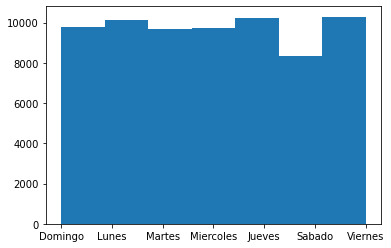

Viernes      10292
Jueves       10251
Lunes        10131
Domingo       9796
Miercoles     9722
Martes        9662
Sabado        8352
Name: DIANOM, dtype: int64

In [35]:
# Solo aplicaremos mes y dia nominal. Anio no tiene sentido si el datase set comprende el anio 2017
plt.hist(data['DIANOM'], data['DIANOM'].nunique())
plt.show()
data['DIANOM'].value_counts()
#data['DIANOM'].value_counts(normalize = True)

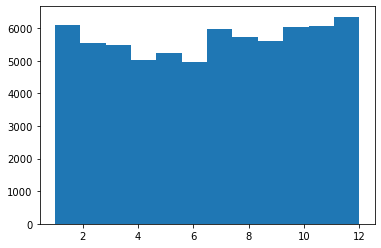

12    6356
1     6108
11    6080
10    6032
7     5992
8     5744
9     5610
2     5561
3     5482
5     5240
4     5020
6     4981
Name: MES, dtype: int64

In [42]:
plt.hist(data['MES'], data['MES'].nunique())
plt.show()
data['MES'].value_counts()
#data['MES'].value_counts(normalize = True)

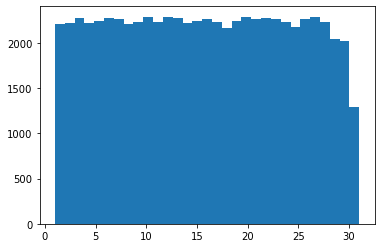

In [46]:
plt.hist(data['DIA'], data['DIA'].nunique())
plt.show()
# Es de esperarse la baja porque no todos los meses tiene 31 o el caso de febrero que no tiene 29 y 30

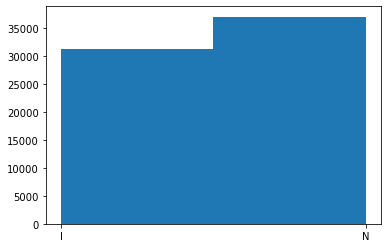

N    0.541976
I    0.458024
Name: TIPOVUELO, dtype: float64

In [48]:
plt.hist(data['TIPOVUELO'], data['TIPOVUELO'].nunique())
plt.show()
data['TIPOVUELO'].value_counts(normalize = True)

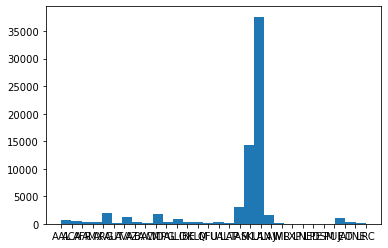

LAN    37611
SKU    14298
TAM     3049
ARG     1949
CMP     1850
LAW     1574
AVA     1152
JAT     1095
GLO      806
AAL      757
ACA      565
IBE      362
AFR      358
DAL      358
AMX      351
UAL      335
ONE      279
AZA      259
KLM      251
LAP      216
BAW      205
QFU      195
JMR      100
LRC       92
AUT       74
PUE       49
LXP        9
LPE        4
DSM        2
LNE        1
Name: Emp-I, dtype: int64

In [50]:
plt.hist(data['Emp-I'], data['Emp-I'].nunique())
plt.show()
data['Emp-I'].value_counts()

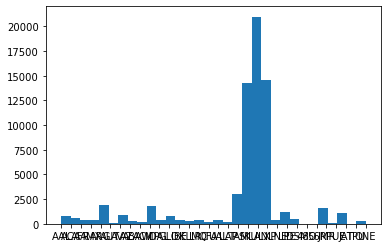

LAN    20988
LXP    14558
SKU    14298
TAM     3046
ARG     1946
CMP     1850
JMR     1647
LPE     1214
JAT     1095
AVA      885
GLO      806
AAL      757
ACA      565
DSM      493
LNE      374
IBE      362
DAL      358
AFR      358
LRC      357
AMX      351
UAL      335
ONE      279
AZA      259
KLM      251
LAP      219
BAW      205
QFA      195
AUT       77
PUE       49
56R       17
48O       10
TPU        2
Name: Emp-O, dtype: int64

In [51]:
plt.hist(data['Emp-O'], data['Emp-O'].nunique())
plt.show()
data['Emp-O'].value_counts()

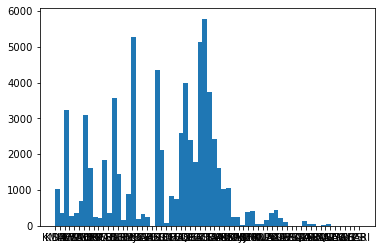

SCFA    5787
SPJC    5270
SCCF    5145
SCTE    4357
SCIE    3995
        ... 
SEQM       1
SBFI       1
SARI       1
SPSO       1
SLCB       1
Name: Des-I, Length: 64, dtype: int64

In [53]:
plt.hist(data['Des-I'], data['Des-I'].nunique())
plt.show()
data['Des-I'].value_counts()

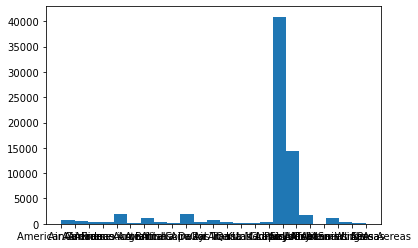

Grupo LATAM                 40892
Sky Airline                 14298
Aerolineas Argentinas        1949
Copa Air                     1850
Latin American Wings         1674
Avianca                      1152
JetSmart SPA                 1095
Gol Trans                     806
American Airlines             757
Air Canada                    565
Iberia                        362
Delta Air                     358
Air France                    358
Aeromexico                    351
United Airlines               335
Oceanair Linhas Aereas        279
Alitalia                      259
K.L.M.                        251
British Airways               205
Qantas Airways                195
Lacsa                          92
Austral                        74
Plus Ultra Lineas Aereas       49
Name: OPERA, dtype: int64

In [54]:
plt.hist(data['OPERA'], data['OPERA'].nunique())
plt.show()
data['OPERA'].value_counts()

### Conclusión
#### Importante destacar que solo existe una ciudad de origen del vuelo, que corresponde a Santiago, y considerando que no existe destino Santiago. Podemos concluir que el datasets solo incluye vuelos que despegan desde Santiago. El campo Ori-I y Ori-O podremo ignorarlos ya que no entregan directamente información para entrenar un modelo.
#### Considerar que el dataset se basa en un anio de vuelos, 2017
#### Notar que en Vlo-I y Vlo-O no mezcla entre string, int y decimal. Importante esta consideración para el procesamiento de datos, en caso de utilizarlos como atributos relevantes en el modelo. 